# CH4

## 4.1 영화 리뷰 분류: 이진 분류 문제

4-1 IMDB 데이터셋 로드하기

In [2]:
from tensorflow.keras.datasets import imdb

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [4]:
# 첫번째 리뷰 단어 인덱스의 리스트
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
# 긍정 리뷰
train_labels[0]

1

In [6]:
max([max(sequence) for sequence in train_data])

9999

4-2 리뷰를 다시 텍스트로 디코딩하기

In [7]:
word_index = imdb.get_word_index()  # word_index는 단어와 정수 인덱스를 제공한 딕셔너리
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]  # 정수 인덱스와 단어를 매핑하도록 뒤집기
)
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]  # 리뷰 디코딩: 0 = 패딩, 1 = 문서시작, 2 = 사전에 없음 예약되어 있으므로 인덱스에서 3 빼기
)

1641221/1641221 [==============================] - 0s 0us/step


In [8]:
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [9]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

4-3 정수 시퀀스를 멀티-핫 인코딩으로 인코딩하기

In [10]:
import numpy as np

In [11]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))  # 크기 (len(sequences), dimension)이고 모두 원소 0인 행렬
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1
  return results

x_train = vectorize_sequences(train_data)  # 훈련 데이터를 벡터로 변환
x_test = vectorize_sequences(test_data)  # 테스트 데이터를 벡터로 변환

In [ ]:
# multi-hot encoding된 벡터
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

4-4 모델 정의하기

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation = "relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

4-5 모델 컴파일하기

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

4-6 검증 세트 준비하기

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

4-7 모델 훈련하기

In [ ]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 6s 108ms/step - loss: 0.5660 - accuracy: 0.7713 - val_loss: 0.4477 - val_accuracy: 0.8637
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3678 - accuracy: 0.8880 - val_loss: 0.3416 - val_accuracy: 0.8767
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2738 - accuracy: 0.9123 - val_loss: 0.2977 - val_accuracy: 0.8875
Epoch 4/20
30/30 [==============================] - 2s 64ms/step - loss: 0.2198 - accuracy: 0.9295 - val_loss: 0.2783 - val_accuracy: 0.8899
Epoch 5/20
30/30 [==============================] - 2s 71ms/step - loss: 0.1851 - accuracy: 0.9403 - val_loss: 0.2827 - val_accuracy: 0.8874
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1577 - accuracy: 0.9497 - val_loss: 0.2783 - val_accuracy: 0.8883
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1368 - accuracy: 0.9559 - val_loss: 0.2830 - val_accuracy: 0.8876
Epoch 8/20
3

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

4-8 훈련과 검증 손실 그리기

In [ ]:
import matplotlib.pyplot as plt

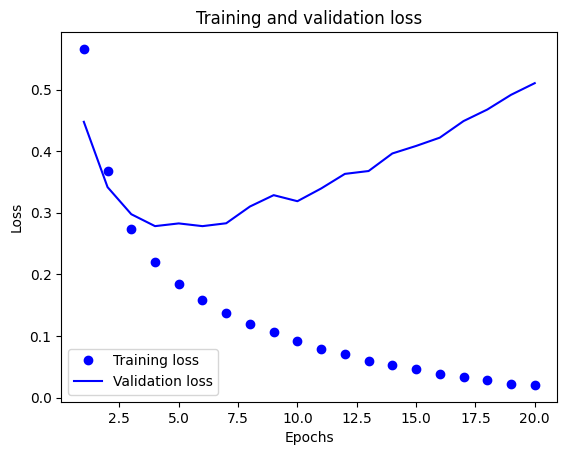

In [ ]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, "bo", label="Training loss")  # bo: 파란색 점 - train loss
plt.plot(epochs, val_loss_values, "b", label="Validation loss")  # b: 파란색 실선 - valid loss
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

4-9 훈련과 검증 정확도 그리기

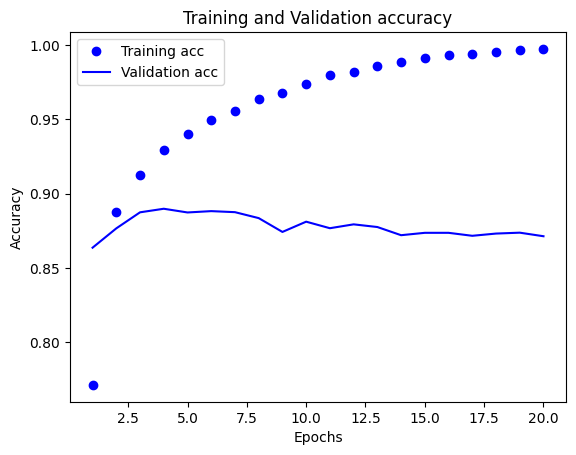

In [ ]:
plt.clf()  # 그래프 초기화
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

4-10 모델을 처음부터 다시 훈련하기

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

추가 실험

- 여기에서 최종 분류 층에서 이전에 2개의 표현층 사용, 1개 또는 3개의 표현 층을 사용하고 검증과 테스트의 정확도에 어떤 영향 미치는지

In [ ]:
# 1개의 층
model1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
model1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
history1 = model1.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 102ms/step - loss: 0.5065 - accuracy: 0.7828 - val_loss: 0.3889 - val_accuracy: 0.8706
Epoch 2/20
30/30 [==============================] - 3s 93ms/step - loss: 0.3240 - accuracy: 0.9001 - val_loss: 0.3237 - val_accuracy: 0.8810
Epoch 3/20
30/30 [==============================] - 2s 67ms/step - loss: 0.2558 - accuracy: 0.9193 - val_loss: 0.2942 - val_accuracy: 0.8880
Epoch 4/20
30/30 [==============================] - 1s 43ms/step - loss: 0.2137 - accuracy: 0.9315 - val_loss: 0.2876 - val_accuracy: 0.8846
Epoch 5/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1866 - accuracy: 0.9407 - val_loss: 0.2741 - val_accuracy: 0.8903
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1667 - accuracy: 0.9489 - val_loss: 0.2827 - val_accuracy: 0.8839
Epoch 7/20
30/30 [==============================] - 2s 52ms/step - loss: 0.1502 - accuracy: 0.9540 - val_loss: 0.2778 - val_accuracy: 0.8876
Epoch 8/20
3

2개의 층일 때보다 검증 정확도가 떨어지는 것으로 확인된다.

In [ ]:
# 3개의 층
model2 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
model2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
history2 = model2.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 88ms/step - loss: 0.5502 - accuracy: 0.7534 - val_loss: 0.4214 - val_accuracy: 0.8376
Epoch 2/20
30/30 [==============================] - 1s 44ms/step - loss: 0.3253 - accuracy: 0.8901 - val_loss: 0.3064 - val_accuracy: 0.8843
Epoch 3/20
30/30 [==============================] - 2s 83ms/step - loss: 0.2337 - accuracy: 0.9190 - val_loss: 0.3110 - val_accuracy: 0.8743
Epoch 4/20
30/30 [==============================] - 2s 68ms/step - loss: 0.1896 - accuracy: 0.9338 - val_loss: 0.2796 - val_accuracy: 0.8869
Epoch 5/20
30/30 [==============================] - 2s 65ms/step - loss: 0.1569 - accuracy: 0.9476 - val_loss: 0.3251 - val_accuracy: 0.8755
Epoch 6/20
30/30 [==============================] - 2s 82ms/step - loss: 0.1256 - accuracy: 0.9592 - val_loss: 0.3466 - val_accuracy: 0.8687
Epoch 7/20
30/30 [==============================] - 2s 53ms/step - loss: 0.1114 - accuracy: 0.9617 - val_loss: 0.3130 - val_accuracy: 0.8828
Epoch 8/20
30

3개의 층이 1개, 2개, 3개에서 3개의 층이 가장 검증 정확도가 떨어진다.

- 층의 유닛을 추가하거나 줄여보세요, 32개의 유닛, 64개의 유닛 등

In [ ]:
# 32개의 유닛
model3 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
model3.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
history3 = model3.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 151ms/step - loss: 0.5095 - accuracy: 0.7695 - val_loss: 0.3804 - val_accuracy: 0.8533
Epoch 2/20
30/30 [==============================] - 2s 67ms/step - loss: 0.3015 - accuracy: 0.8947 - val_loss: 0.3012 - val_accuracy: 0.8817
Epoch 3/20
30/30 [==============================] - 2s 63ms/step - loss: 0.2270 - accuracy: 0.9192 - val_loss: 0.2891 - val_accuracy: 0.8849
Epoch 4/20
30/30 [==============================] - 2s 63ms/step - loss: 0.1821 - accuracy: 0.9371 - val_loss: 0.2814 - val_accuracy: 0.8883
Epoch 5/20
30/30 [==============================] - 3s 95ms/step - loss: 0.1495 - accuracy: 0.9497 - val_loss: 0.3120 - val_accuracy: 0.8815
Epoch 6/20
30/30 [==============================] - 2s 61ms/step - loss: 0.1210 - accuracy: 0.9612 - val_loss: 0.3443 - val_accuracy: 0.8773
Epoch 7/20
30/30 [==============================] - 2s 76ms/step - loss: 0.1087 - accuracy: 0.9653 - val_loss: 0.3182 - val_accuracy: 0.8805
Epoch 8/20
3

검증 정확도가 상대적으로 좋아졌지만 아직 2개의 층 16개의 유닛보다는 낮다.

In [ ]:
# 64개의 유닛
model4 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
model4.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
history4 = model4.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 6s 163ms/step - loss: 0.5073 - accuracy: 0.7651 - val_loss: 0.4219 - val_accuracy: 0.8125
Epoch 2/20
30/30 [==============================] - 4s 139ms/step - loss: 0.3047 - accuracy: 0.8837 - val_loss: 0.3049 - val_accuracy: 0.8744
Epoch 3/20
30/30 [==============================] - 2s 83ms/step - loss: 0.2254 - accuracy: 0.9135 - val_loss: 0.3131 - val_accuracy: 0.8706
Epoch 4/20
30/30 [==============================] - 3s 110ms/step - loss: 0.1824 - accuracy: 0.9327 - val_loss: 0.3315 - val_accuracy: 0.8706
Epoch 5/20
30/30 [==============================] - 3s 106ms/step - loss: 0.1564 - accuracy: 0.9440 - val_loss: 0.3098 - val_accuracy: 0.8797
Epoch 6/20
30/30 [==============================] - 4s 120ms/step - loss: 0.1301 - accuracy: 0.9519 - val_loss: 0.3344 - val_accuracy: 0.8756
Epoch 7/20
30/30 [==============================] - 3s 113ms/step - loss: 0.0989 - accuracy: 0.9655 - val_loss: 0.3245 - val_accuracy: 0.8802
Epoch 8

원래의 모델보다 검증 정확도는 높아졌지만 검증손실은 더 나아지지 못했다.   

- binary_crossentropy 대신 mse 손실 함수 사용

In [ ]:
model5 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
model5.compile(optimizer="rmsprop",
              loss="mse",  # binary_crossentropy
              metrics=["accuracy"])

In [ ]:
history5 = model5.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 86ms/step - loss: 0.1900 - accuracy: 0.7644 - val_loss: 0.1392 - val_accuracy: 0.8548
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1132 - accuracy: 0.8797 - val_loss: 0.1086 - val_accuracy: 0.8717
Epoch 3/20
30/30 [==============================] - 1s 43ms/step - loss: 0.0840 - accuracy: 0.9070 - val_loss: 0.1093 - val_accuracy: 0.8569
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0693 - accuracy: 0.9220 - val_loss: 0.0883 - val_accuracy: 0.8831
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0581 - accuracy: 0.9341 - val_loss: 0.0957 - val_accuracy: 0.8711
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0503 - accuracy: 0.9444 - val_loss: 0.0861 - val_accuracy: 0.8848
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0450 - accuracy: 0.9504 - val_loss: 0.0846 - val_accuracy: 0.8857
Epoch 8/20
30

loss를 binary_crossentropy 대신 mse로 계산했을 때 상대적인 숫자가 줄어든 것을 볼 수 있다.

- relu 대신 tanh 활성화함수(초기 신경망에서 인기 있었던 함수) 사용

In [ ]:
model6 = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

NameError: ignored

In [ ]:
model6.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

NameError: ignored

In [ ]:
history6 = model6.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

relu 대신 tanh로 했을 때 검증정확도가 relu로 했을 때보다 낮고 검증 손실이 relu로 했을 때보다 높아 relu가 성능이 더 나은 것으로 볼 수 있다.

## 4.2 뉴스 기사 분류: 다중 분류 문제

4-11 로이터 데이터셋 로드하기

In [12]:
from tensorflow.keras.datasets import reuters

In [13]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


4-12 로이터 데이터셋을 텍스트로 디코딩하기

In [14]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join(
    [reverse_word_index.get(i-3, "?") for i in train_data[0]])  # 0, 1, 2는 패딩, 문서시작, 사전에 없음을 위해 예약되어있음 -> 인덱스에서 3을 뺌

550378/550378 [==============================] - 0s 0us/step


4-13 데이터 인코딩하기

In [15]:
x_train = vectorize_sequences(train_data)  # train 벡터로 변환
x_test = vectorize_sequences(test_data)  # test 벡터로 변환

4-14 레이블 인코딩하기

In [16]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [18]:
# 케라스 내장 함수 사용 가능
# from keras.utils.np_utils import to_categorical

# y_train = to_categorical(train_labels)
# y_test = to_categorical(test_labels)

4-15 모델 정의하기

In [23]:
import keras
from keras import layers

In [24]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

4-16 모델 컴파일하기

In [26]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

4-17 검증 세트 준비하기

In [27]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [28]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 77ms/step - loss: 2.6543 - accuracy: 0.4762 - val_loss: 1.8045 - val_accuracy: 0.6150
Epoch 2/20
16/16 [==============================] - 1s 83ms/step - loss: 1.5310 - accuracy: 0.6718 - val_loss: 1.3786 - val_accuracy: 0.6840
Epoch 3/20
16/16 [==============================] - 1s 87ms/step - loss: 1.1816 - accuracy: 0.7405 - val_loss: 1.2162 - val_accuracy: 0.7330
Epoch 4/20
16/16 [==============================] - 1s 48ms/step - loss: 0.9650 - accuracy: 0.7894 - val_loss: 1.1013 - val_accuracy: 0.7490
Epoch 5/20
16/16 [==============================] - 1s 80ms/step - loss: 0.8015 - accuracy: 0.8277 - val_loss: 0.9994 - val_accuracy: 0.7930
Epoch 6/20
16/16 [==============================] - 1s 60ms/step - loss: 0.6644 - accuracy: 0.8617 - val_loss: 0.9492 - val_accuracy: 0.8050
Epoch 7/20
16/16 [==============================] - 1s 66ms/step - loss: 0.5538 - accuracy: 0.8835 - val_loss: 0.9368 - val_accuracy: 0.8070
Epoch 8/20
16

4-19 훈련과 검증 손실 그리기

In [29]:
import matplotlib.pyplot as plt

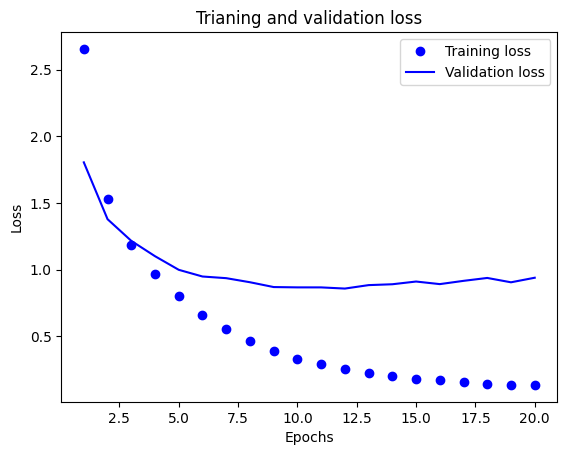

In [30]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Trianing and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

4-20 훈련과 검증 정확도 그리기

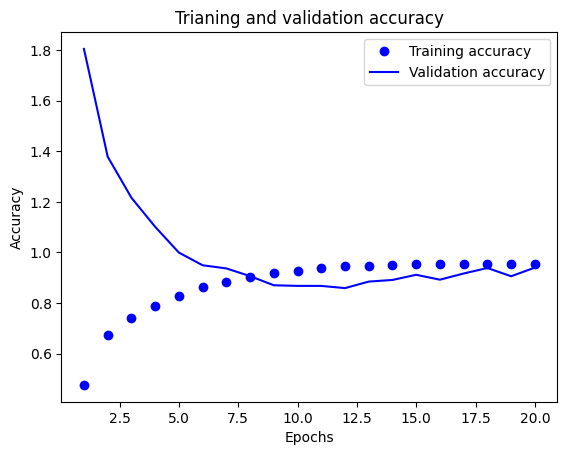

In [32]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_loss, "b", label="Validation accuracy")
plt.title("Trianing and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

4-21 모델을 처음부터 다시 훈련하기

In [34]:
model = keras.Sequential([
    layers.Dense(64, activation = "relu"),
    layers.Dense(64, activation = "relu"),
    layers.Dense(46, activation = "softmax")
])

model.compile(optimizer = "rmsprop",
              loss = "categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=3,
          batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/3
18/18 [==============================] - 1s 46ms/step - loss: 2.6319 - accuracy: 0.5020
Epoch 2/3
18/18 [==============================] - 1s 43ms/step - loss: 1.4880 - accuracy: 0.6904
Epoch 3/3
71/71 [==============================] - 1s 5ms/step - loss: 1.2128 - accuracy: 0.7346


In [35]:
# 랜덤한 분류기의 분류 정확도 -> 19%
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.1856634016028495

새로운 데이터에 대해 예측하기

In [36]:
predictions = model.predict(x_test)
predictions[0].shape

71/71 [==============================] - 0s 4ms/step


(46,)

In [37]:
np.sum(predictions[0])

0.99999994

In [38]:
np.argmax(predictions[0])

3

레이블과 손실을 다루는 다른 방법 : 정수로 인코딩

In [39]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [40]:
model.compile(optimizer="rmsprop",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

4-22 정보 병목이 있는 모델

In [41]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer = "rmsprop",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

model.fit(partial_x_train,
          partial_y_train,
          epochs = 20,
          batch_size = 128,
          validation_data = (x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 20ms/step - loss: 2.9159 - accuracy: 0.2908 - val_loss: 2.2627 - val_accuracy: 0.3830
Epoch 2/20
63/63 [==============================] - 1s 17ms/step - loss: 1.8989 - accuracy: 0.4733 - val_loss: 1.5953 - val_accuracy: 0.6190
Epoch 3/20
63/63 [==============================] - 1s 16ms/step - loss: 1.4128 - accuracy: 0.6498 - val_loss: 1.3727 - val_accuracy: 0.6710
Epoch 4/20
63/63 [==============================] - 1s 17ms/step - loss: 1.2087 - accuracy: 0.7053 - val_loss: 1.2775 - val_accuracy: 0.7000
Epoch 5/20
63/63 [==============================] - 1s 16ms/step - loss: 1.0836 - accuracy: 0.7259 - val_loss: 1.2418 - val_accuracy: 0.7070
Epoch 6/20
63/63 [==============================] - 1s 21ms/step - loss: 0.9909 - accuracy: 0.7404 - val_loss: 1.2065 - val_accuracy: 0.7140
Epoch 7/20
63/63 [==============================] - 2s 27ms/step - loss: 0.9138 - accuracy: 0.7585 - val_loss: 1.2064 - val_accuracy: 0.7240
Epoch 8/20
63

확실히 정확도가 낮음

## 4.3 주택 가격 예측: 회귀 문제

4-23 보스턴 주택 데이터셋 로드하기

In [42]:
from tensorflow.keras.datasets import boston_housing

In [45]:
(train_data, train_targets), (test_data, test_targets) = (
    boston_housing.load_data()
)

In [46]:
train_data.shape

(404, 13)

In [47]:
test_data.shape

(102, 13)

In [48]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

4-24 데이터 정규화하기

In [50]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

4-25 모델 정의하기

In [52]:
def build_model():
  model = keras.Sequential([
      layers.Dense(64, activation = "relu"),
      layers.Dense(64, activation = "relu"),
      layers.Dense(1)
  ])
  model.compile(optimizer="rmsprop", loss="mse", metrics = ["mae"])

  return model

4-26 k-겹 검증하기

In [58]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print(f"#{i}번째 폴드 처리중")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)

    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)  # verbose=0: 과정 출력 X
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

#0번째 폴드 처리중
#1번째 폴드 처리중
#2번째 폴드 처리중
#3번째 폴드 처리중


In [59]:
all_scores

[2.080071449279785, 2.6106231212615967, 2.524118661880493, 2.480774402618408]

In [60]:
np.mean(all_scores)

2.423896908760071

4-29 각 폴드의 검증 점수 저장하기

In [62]:
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print(f"#{i}번째 폴드 처리중")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)

    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)

    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

#0번째 폴드 처리중
#1번째 폴드 처리중
#2번째 폴드 처리중
#3번째 폴드 처리중


4-28 k-겹 검증 점수 평균 기록하기

In [65]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

4-29 검증 점수 그래프 그리기

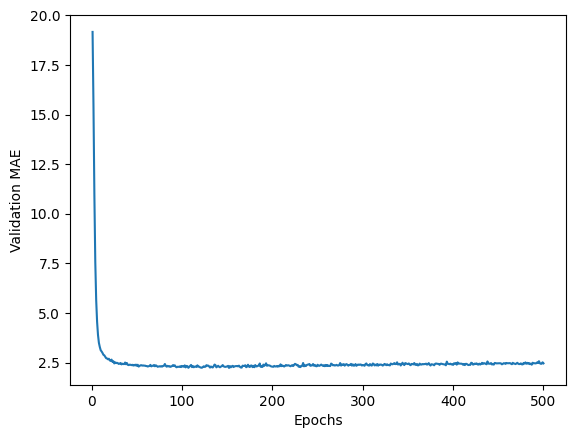

In [66]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

4-30 처음 10개의 데이터 포인트를 제외한 검증 점수 그래프 그리기

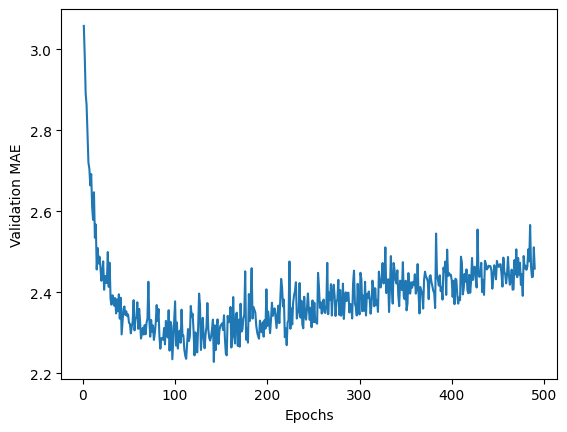

In [67]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

4-31 최종모델 훈련하기

In [70]:
model = build_model()
model.fit(train_data, train_targets, epochs=130, batch_size = 16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 777.9637 - mae: 27.0599


In [71]:
test_mae_score

27.05986785888672

새로운 데이터에 대해 예측하기

In [72]:
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 4ms/step


array([30.610977], dtype=float32)